Implementar los problemas 3, 4 y 6 de la práctica 2 utilizando Keras.

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.datasets import cifar10

%matplotlib inline

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [12]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

ytrain = ytrain[:,0]
ytest = ytest[:,0]

Xtrain = Xtrain.astype(float)
Xtest = Xtest.astype(float)

m = Xtrain.shape[0]
n = Xtrain[0].size

mu = np.mean(Xtrain, axis=0)
std = np.std(Xtrain, axis=0)

Xtrain -= mu
Xtrain /= std
Xtest -= mu
Xtest /= std

#Xtrain = np.reshape(Xtrain, (m, n))
#Xtest = np.reshape(Xtest, (Xtest.shape[0],))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


In [13]:
#Los paso a categorical para que quede bien definida la loss y la metrica
ytrain = tf.keras.utils.to_categorical(ytrain, 10)
ytest = tf.keras.utils.to_categorical(ytest, 10)
ytrain.shape

(50000, 10)

Ej. 3

In [23]:
def scheduler(epoch, lr):
  if ((epoch+1) % 10) == 0:
    return lr/3
  else:
    return lr


callbacks_list=[
    tf.keras.callbacks.LearningRateScheduler(
      scheduler, verbose=0
    ),

]

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=.0001)

input = tf.keras.layers.Input(shape=(32,32,3))
flat = tf.keras.layers.Flatten()(input)
l1 = tf.keras.layers.Dense(100, activation='sigmoid', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(flat)
output = tf.keras.layers.Dense(10, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(l1)

model = tf.keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               307300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=opt, loss=tf.keras.losses.mean_squared_error, metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
hist3 = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=50, 
                  batch_size=128, verbose=2)

Epoch 1/50
391/391 - 26s - loss: 0.4467 - accuracy: 0.1271 - val_loss: 0.2736 - val_accuracy: 0.2368 - 26s/epoch - 65ms/step
Epoch 2/50
391/391 - 6s - loss: 0.2398 - accuracy: 0.3342 - val_loss: 0.2164 - val_accuracy: 0.3829 - 6s/epoch - 15ms/step
Epoch 3/50
391/391 - 5s - loss: 0.1976 - accuracy: 0.3985 - val_loss: 0.1820 - val_accuracy: 0.4033 - 5s/epoch - 13ms/step
Epoch 4/50
391/391 - 5s - loss: 0.1675 - accuracy: 0.4164 - val_loss: 0.1559 - val_accuracy: 0.4168 - 5s/epoch - 13ms/step
Epoch 5/50
391/391 - 5s - loss: 0.1450 - accuracy: 0.4253 - val_loss: 0.1375 - val_accuracy: 0.4098 - 5s/epoch - 13ms/step
Epoch 6/50
391/391 - 5s - loss: 0.1284 - accuracy: 0.4338 - val_loss: 0.1231 - val_accuracy: 0.4166 - 5s/epoch - 13ms/step
Epoch 7/50
391/391 - 5s - loss: 0.1165 - accuracy: 0.4380 - val_loss: 0.1127 - val_accuracy: 0.4280 - 5s/epoch - 13ms/step
Epoch 8/50
391/391 - 5s - loss: 0.1079 - accuracy: 0.4411 - val_loss: 0.1058 - val_accuracy: 0.4174 - 5s/epoch - 13ms/step
Epoch 9/50
391

Ej. 4

In [9]:
opt2 = tf.keras.optimizers.Adam(learning_rate=.001)

input = tf.keras.layers.Input(shape=(32,32,3))
flat = tf.keras.layers.Flatten()(input)
l1 = tf.keras.layers.Dense(100, activation='sigmoid', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(flat)
output = tf.keras.layers.Dense(10, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(l1)

model2 = tf.keras.Model(inputs=input, outputs=output)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               307300    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.compile(optimizer=opt2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist4 = model2.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=50, batch_size=128, verbose=2)

Epoch 1/50
391/391 - 4s - loss: 1.9405 - accuracy: 0.3837 - val_loss: 1.8333 - val_accuracy: 0.4121 - 4s/epoch - 9ms/step
Epoch 2/50
391/391 - 3s - loss: 1.7927 - accuracy: 0.4239 - val_loss: 1.7840 - val_accuracy: 0.4239 - 3s/epoch - 7ms/step
Epoch 3/50
391/391 - 3s - loss: 1.7547 - accuracy: 0.4341 - val_loss: 1.7714 - val_accuracy: 0.4239 - 3s/epoch - 9ms/step
Epoch 4/50
391/391 - 6s - loss: 1.7380 - accuracy: 0.4377 - val_loss: 1.7597 - val_accuracy: 0.4322 - 6s/epoch - 14ms/step
Epoch 5/50
391/391 - 4s - loss: 1.7279 - accuracy: 0.4426 - val_loss: 1.7631 - val_accuracy: 0.4268 - 4s/epoch - 11ms/step
Epoch 6/50
391/391 - 3s - loss: 1.7221 - accuracy: 0.4460 - val_loss: 1.7634 - val_accuracy: 0.4306 - 3s/epoch - 8ms/step
Epoch 7/50
391/391 - 3s - loss: 1.7121 - accuracy: 0.4497 - val_loss: 1.7498 - val_accuracy: 0.4333 - 3s/epoch - 7ms/step
Epoch 8/50
391/391 - 5s - loss: 1.7004 - accuracy: 0.4577 - val_loss: 1.7431 - val_accuracy: 0.4402 - 5s/epoch - 12ms/step
Epoch 9/50
391/391 - 

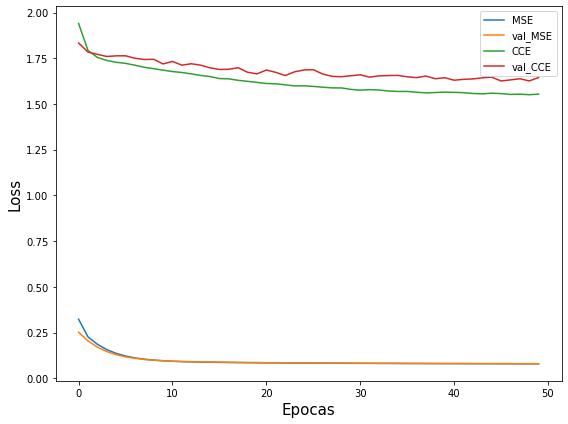

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(hist3.history['loss'], label='MSE')
plt.plot(hist3.history['val_loss'], label='val_MSE')
plt.plot(hist4.history['loss'], label='CCE')
plt.plot(hist4.history['val_loss'], label='val_CCE')
plt.xlabel('Epocas', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

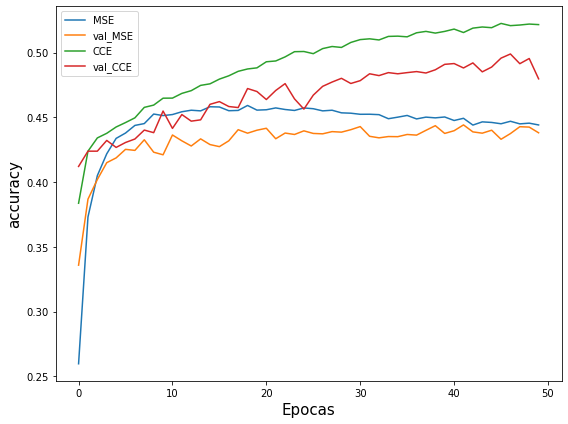

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(hist3.history['accuracy'], label='MSE')
plt.plot(hist3.history['val_accuracy'], label='val_MSE')
plt.plot(hist4.history['accuracy'], label='CCE')
plt.plot(hist4.history['val_accuracy'], label='val_CCE')
plt.xlabel('Epocas', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Ej. 6

In [2]:
def acc(ypred, ytrue, threshold=.2):
    res = tf.reduce_mean(tf.cast(tf.less_equal(tf.abs(ytrue - ypred), threshold), tf.float32))
    return res


In [3]:
X_train = np.array([[-1, -1],
                    [-1, 1],
                    [1, -1],
                    [1, 1]], dtype=float)

y_train = np.array([[-1], [1], [1], [-1]], dtype=float)

n_features = X_train.shape[1]

print(X_train.shape, y_train.shape)

(4, 2) (4, 1)


Arquitectura a

In [10]:
opt3 = tf.keras.optimizers.SGD(learning_rate=.01)

input = tf.keras.layers.Input(shape=(2))
l1 = tf.keras.layers.Dense(2, activation='tanh', use_bias=True)(input)
output = tf.keras.layers.Dense(1, activation='tanh', use_bias=True)(l1)

model3 = tf.keras.Model(inputs=input, outputs=output)

model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [13]:
model3.compile(optimizer=opt3, loss=tf.keras.losses.MSE, metrics=[acc])
hist6a = model3.fit(X_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.0962 - acc: 0.0000e+00 - 365ms/epoch - 365ms/step
Epoch 2/1000
1/1 - 0s - loss: 0.0959 - acc: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.0956 - acc: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.0954 - acc: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.0951 - acc: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.0949 - acc: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.0946 - acc: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.0943 - acc: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.0941 - acc: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.0938 - acc: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.0936 - acc: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.0933 - acc: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.0931 - acc: 0.0000e+00 -

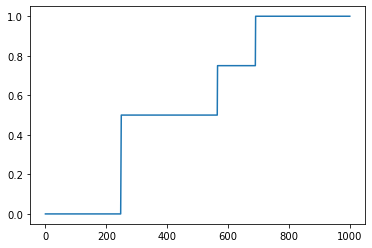

In [16]:
plt.plot(hist6a.history['acc'])

Arquitectura b

In [15]:
opt4 = tf.keras.optimizers.Adam(learning_rate=.001)

input = tf.keras.layers.Input(shape=(2))
l1 = tf.keras.layers.Dense(1, activation='tanh', use_bias=True)(input)
concat = tf.keras.layers.concatenate([l1, input])
output = tf.keras.layers.Dense(1, activation='tanh', use_bias=True)(concat)

model4 = tf.keras.Model(inputs=input, outputs=output)

model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 1)            3           ['input_5[0][0]']                
                                                                                                  
 concatenate_4 (Concatenate)    (None, 3)            0           ['dense_8[0][0]',                
                                                                  'input_5[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 1)            4           ['concatenate_4[0][0]']    

In [16]:
model4.compile(optimizer=opt4, loss=tf.keras.losses.MSE, metrics=[acc])
hist6b = model4.fit(X_train, y_train, epochs=5000, verbose=0)

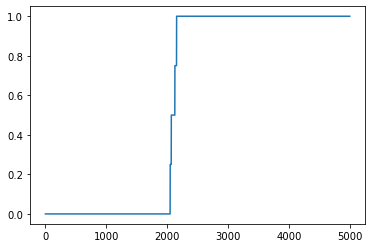

In [17]:
plt.plot(hist6b.history['acc'])